# Вежба за подготовка на податоци

Се работи со податочно множество за плати на играчи од професионалната кошаркарска лига НБА во САД. Податоците се сметени во две табели, при што во едната се податоците за играчите, а во другата годишните плати. Ќе се направат различни испитувања, при што на почетокот ќе се покажат некои постапки за средување на Пандас табела.

Прво се вчитуваат двете датотеки, кои претходно се преземени од Интернет и се снимени на работниот компјутер на исто место каде што е и оваа програма. Веднаш по вчитувањето се прави увид во видот на податоците и колку недостасуваат

In [1]:
import pandas as pd

Igrachi = pd.read_csv('datadavis-nba-salaries/players.csv')
Plati = pd.read_csv('datadavis-nba-salaries/salaries_1985to2018.csv')
Igrachi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id          4685 non-null   object 
 1   birthDate    4657 non-null   object 
 2   birthPlace   4185 non-null   object 
 3   career_AST   4685 non-null   float64
 4   career_FG%   4685 non-null   object 
 5   career_FG3%  3557 non-null   object 
 6   career_FT%   4685 non-null   object 
 7   career_G     4685 non-null   int64  
 8   career_PER   4685 non-null   object 
 9   career_PTS   4685 non-null   float64
 10  career_TRB   4685 non-null   object 
 11  career_WS    4685 non-null   object 
 12  career_eFG%  3557 non-null   object 
 13  college      4372 non-null   object 
 14  draft_pick   3369 non-null   object 
 15  draft_round  3507 non-null   object 
 16  draft_team   3507 non-null   object 
 17  draft_year   3306 non-null   object 
 18  height       4685 non-null   object 
 19  highSc

In [2]:
Plati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14163 entries, 0 to 14162
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   league        14163 non-null  object
 1   player_id     14163 non-null  object
 2   salary        14163 non-null  int64 
 3   season        14163 non-null  object
 4   season_end    14163 non-null  int64 
 5   season_start  14163 non-null  int64 
 6   team          14159 non-null  object
dtypes: int64(3), object(4)
memory usage: 774.7+ KB


Се гледа дека множеството плати има многу повеќе записи. Тоа е поради тоа што во секоја година може да има различна плата. Како што е вообичаено, ги печатиме и првите неколку реда за да ги видиме податоците.

In [3]:
Igrachi.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [8]:
Plati.head()

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


За вежба ќе пoкажеме отстранување на колони

In [7]:
ZaOtstranuvanje = ['draft_pick', 'draft_year', 'draft_round', 'draft_team']
ProchistenaTabela = Igrachi.drop(columns=ZaOtstranuvanje)
ProchistenaTabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id          4685 non-null   object 
 1   birthDate    4657 non-null   object 
 2   birthPlace   4185 non-null   object 
 3   career_AST   4685 non-null   float64
 4   career_FG%   4685 non-null   object 
 5   career_FG3%  3557 non-null   object 
 6   career_FT%   4685 non-null   object 
 7   career_G     4685 non-null   int64  
 8   career_PER   4685 non-null   object 
 9   career_PTS   4685 non-null   float64
 10  career_TRB   4685 non-null   object 
 11  career_WS    4685 non-null   object 
 12  career_eFG%  3557 non-null   object 
 13  college      4372 non-null   object 
 14  height       4685 non-null   object 
 15  highSchool   4025 non-null   object 
 16  name         4685 non-null   object 
 17  position     4685 non-null   object 
 18  shoots       4684 non-null   object 
 19  weight

Поинаков начин за добивање на дел од табела е да се превземе само она што ни треба

In [6]:
PomalaTabela = Igrachi[['_id', 'name', 'position']]
PomalaTabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   _id       4685 non-null   object
 1   name      4685 non-null   object
 2   position  4685 non-null   object
dtypes: object(3)
memory usage: 109.9+ KB


Сега ќе исцртаме некои колони, со цел да увидиме дали има нешто воочливо

<Axes: xlabel='height', ylabel='career_PTS'>

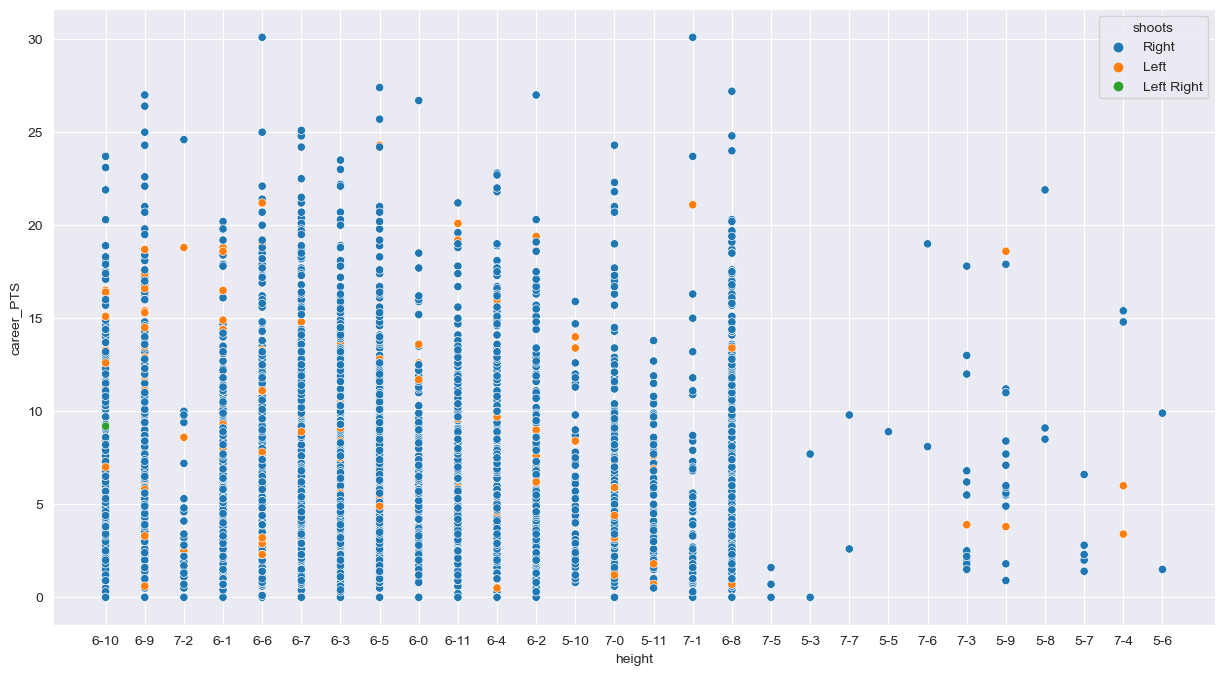

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt  # just to change the dimensions of the plot

plt.figure(figsize=(15, 8))  # just to change the dimensions of the plot
sns.scatterplot(data=Igrachi, y='career_PTS', x='height', hue='shoots')

Направено е исцртување на просечниот број на поени по натпревар, во зависност од висината на играчот, за три различни категори (со задавањето на hue). Забележливо е тоа што со некои висини, кои не се најголеми, има малку играчи во НБА. 

# Испитување на некои статистички податоци за играчите

Во овој дел ќе покажеме како со употреба на пивот табелите и групирањето на податоци може да се добијат некои интересни наоди. Прво ќе се обидеме да најдеме колку поени по просек има најдобриот кошаркар од секоја генерација. За генерација се смета годината кога некој кошаркар влегува во лигата, односно кога се прави драфт листата

In [15]:
NajdobriStrelci = pd.pivot_table(data=Igrachi, index=['draft_year'],
                                 values=['career_PTS'], aggfunc='max')
print(NajdobriStrelci)

            career_PTS
draft_year            
1947              13.2
1948              18.5
1949              22.5
1950              19.2
1951              11.1
...                ...
2016              16.4
2017              22.1
2018              21.2
2nd               10.6
8th                0.9

[75 rows x 1 columns]


Со следниот пример ќе направиме табела со приказ на највисоката плата за секој клуб за секоја сезона со помош на пивот табела. Во позадина се врши групирање на платите на сите играчи за даден клуб и за дадена сезона и се наоѓа најголемата плата во секоај таква група. Потоа редовите во табелата се прикажани подредени по име на клубот, во опаѓачки редослед

In [18]:
NajPlataPoSezonaIKlub = pd.pivot_table(data=Plati, index=['team'], columns=['season'],
                                       values=['salary'], aggfunc='max')
NajPlataPoSezonaIKlub.sort_values(by=['team'])
print(NajPlataPoSezonaIKlub)

                                      salary                                   \
season                               1984-85    1985-86    1986-87    1987-88   
team                                                                            
Atlanta Hawks                       678000.0   743000.0  1100000.0  1460000.0   
Boston Celtics                     1800000.0  1800000.0  1800000.0  2038333.0   
Brooklyn Nets                            NaN        NaN        NaN        NaN   
Charlotte Bobcats                        NaN        NaN        NaN        NaN   
Charlotte Hornets                        NaN        NaN        NaN        NaN   
Chicago Bulls                       660000.0   806000.0   710000.0   845000.0   
Cleveland Cavaliers                 675000.0   675000.0   301666.0   887500.0   
Dallas Mavericks                    800000.0   626240.0   500000.0   755000.0   
Denver Nuggets                      790000.0   825000.0    75000.0  1500000.0   
Detroit Pistons             

# Работа со споени табели 

Во претходните примери се правеа анализи на платите, без да не интересира за кој играч која плата се однесува. За да ги проучиме платите за играчите треба да се спојат двете табели. Така ќе можеме да знаеме кој играч колку земал по сезона. Бидејќи идентификацискиот број на играчите има различно име во двете табели, треба да се каже под кое име се среќава во првата табела (левата), а под кое во втората (десната)

In [20]:
IgrachiIPlati = pd.merge(Igrachi, Plati, left_on='_id', right_on='player_id')
IgrachiIPlati.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,position,shoots,weight,league,player_id,salary,season,season_end,season_start,team
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,Power Forward,Right,240lb,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


Сега може да се пресемета просечната годишна плата по играч за сите сезони, при шо ќе се прикаже неговото име наместо идентификацискиот број. Потоа ги подредуваме играчите по средна плата, во опаѓачки редослед

In [22]:
SrednaPlata = pd.pivot_table(data=IgrachiIPlati, index=['name'],
                             values=['salary'], aggfunc='mean')
SrednaPlata.sort_values(by=['salary'], inplace=True, ascending=False)
SrednaPlata.head()

,salary
name,
Kobe Bryant,1.641190e+07
LeBron James,1.580136e+07
Kevin Garnett,1.563056e+07
Carmelo Anthony,1.546676e+07
Shaquille O'Neal,1.537886e+07


Следно, на пример, може да провериме од секој клуб која е просечната плата за секоја сезона

In [23]:
ProsechnaPlata = pd.pivot_table(data=IgrachiIPlati, index=['team'], columns=['season'],
                                values=['salary'], aggfunc='mean')
ProsechnaPlata.head()

salary                                               \
season                   1984-85        1985-86        1986-87        1987-88   
team                                                                            
Atlanta Hawks      319333.333333  282403.846154  715000.000000  506476.923077   
Boston Celtics     557636.363636  546666.666667  808333.333333  714141.000000   
Brooklyn Nets                NaN            NaN            NaN            NaN   
Charlotte Bobcats            NaN            NaN            NaN            NaN   
Charlotte Hornets            NaN            NaN            NaN            NaN   

                                                                             \
season                   1988-89       1989-90        1990-91       1991-92   
team                                                                          
Atlanta Hawks      527321.428571  2.133333e+06  904692.307692  9.946154e+05   
Boston Celtics     652217.923077  1.983333e+06  750400.000000  1.490765e+06   
Brooklyn Nets                NaN           NaN            NaN           NaN   
Charlotte Bobcats            NaN           NaN            NaN           NaN   
Charlotte Hornets  340714.285714  1.100000e+06  801307.692308  1.052083e+06   

                                               ...                \
season                  1992-93       1993-94  ...       2008-09   
team                                           ...                 
Atlanta Hawks      1.288286e+06  1.406875e+06  ...  4.544589e+06   
Boston Celtics     1.200810e+06  1.192067e+06  ...  6.091459e+06   
Brooklyn Nets               NaN           NaN  ...           NaN   
Charlotte Bobcats           NaN           NaN  ...  3.698054e+06   
Charlotte Hornets  1.010714e+06  1.282286e+06  ...           NaN   

                                                                           \
season                  2009-10       2010-11       2011-12       2012-13   
team                                                                        
Atlanta Hawks      4.705974e+06  5.104989e+06  4.604370e+06  3.709354e+06   
Boston Celtics     5.968012e+06  5.860419e+06  5.321369e+06  4.043622e+06   
Brooklyn Nets               NaN           NaN           NaN  5.587773e+06   
Charlotte Bobcats  4.905840e+06  3.696816e+06  3.860135e+06  3.832793e+06   
Charlotte Hornets           NaN           NaN           NaN           NaN   

                                                                           \
season                  2013-14       2014-15       2015-16       2016-17   
team                                                                        
Atlanta Hawks      3.937977e+06  3.431628e+06  4.758542e+06  5.050382e+06   
Boston Celtics     5.797237e+06  2.970907e+06  4.638723e+06  5.560306e+06   
Brooklyn Nets      7.272866e+06  6.091077e+06  4.606191e+06  3.496090e+06   
Charlotte Bobcats  4.344219e+06           NaN           NaN           NaN   
Charlotte Hornets           NaN  4.219692e+06  4.850617e+06  5.290847e+06   

                                 
season                  2017-18  
team                             
Atlanta Hawks      3.975012e+06  
Boston Celtics     6.387935e+06  
Brooklyn Nets      5.644974e+06  
Charlotte Bobcats           NaN  
Charlotte Hornets  8.373440e+06  

[5 rows x 34 columns]

Може да се најде средната плата по сезона, за сите клубови и да се нацрта за да добиеме претстава како растеле платите со текот на времето

<Axes: xlabel='season'>

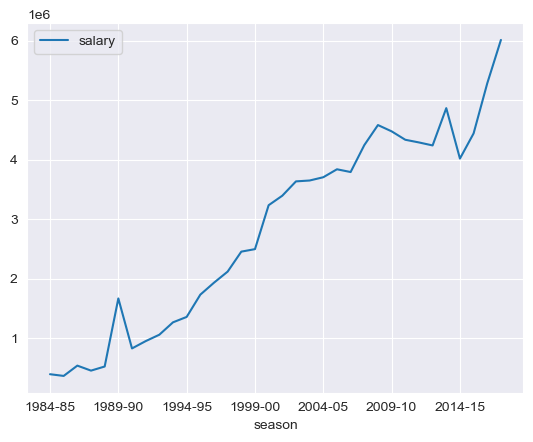

In [24]:
PlataPoSezona = pd.pivot_table(data=IgrachiIPlati, index=['season'],
                               values=['salary'], aggfunc='mean')
PlataPoSezona.plot()

Во овој дел ќе  најдеме кој е најдобро платениот играч за секоја сезона. За ова ќе ја употребиме функцијата idxmax која дава во кој ред се наоѓа записот чија вредност е најголема во дадена колона. Со краток код ќе ги испишеме имињата на најплатените играчи по сезона

In [39]:
Sezoni = IgrachiIPlati.groupby(['season'])
for sezona, SiteVoSezona in Sezoni:
    RedNaNajplaten = SiteVoSezona['salary'].idxmax()
    print(sezona, SiteVoSezona.loc[RedNaNajplaten, 'name'])

1984-85 Magic Johnson
1985-86 Magic Johnson
1986-87 Larry Bird
1987-88 Patrick Ewing
1988-89 Patrick Ewing
1989-90 Patrick Ewing
1990-91 Patrick Ewing
1991-92 Larry Bird
1992-93 David Robinson
1993-94 David Robinson
1994-95 David Robinson
1995-96 Patrick Ewing
1996-97 Michael Jordan
1997-98 Michael Jordan
1998-99 Patrick Ewing
1999-00 Shaquille O'Neal
2000-01 Kevin Garnett
2001-02 Kevin Garnett
2002-03 Kevin Garnett
2003-04 Kevin Garnett
2004-05 Shaquille O'Neal
2005-06 Shaquille O'Neal
2006-07 Kevin Garnett
2007-08 Kevin Garnett
2008-09 Kevin Garnett
2009-10 Tracy McGrady
2010-11 Kobe Bryant
2011-12 Kobe Bryant
2012-13 Kobe Bryant
2013-14 Kobe Bryant
2014-15 Kobe Bryant
2015-16 Kobe Bryant
2016-17 LeBron James
2017-18 Stephen Curry


Во следниот пример ќе ги издвоиме играчите кои играат на местото центар и ќе најдеме кој постигнал најмногу поени во кариерата

In [40]:
SamoCentri = IgrachiIPlati[IgrachiIPlati['position'].str.contains('Center')]
RedNaNajplaten = SamoCentri['career_PTS'].idxmax()
print(SamoCentri.loc[RedNaNajplaten, 'name'])

Kareem Abdul-Jabbar


# Задачи

Со посоченото множество може да се прават различни истражувања. Обидете се да ги добиете следните резултати, како и некои кои што вие сметате дека би биле занимливи.

1. Да се најде кошаркарот со најмногу поени, за секоја висина посебно (да се споредуваат играчите со иста висина).
2. Да се најде просечнта плата на играчите кои што играат на позициите 'Power Forward' или 'Point Guard'
3. Да се најде просечната висина на играчите во секој тим, за секоја сезона.

In [41]:
IgrachiIPlati.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14163 entries, 0 to 14162
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           14163 non-null  object 
 1   birthDate     14163 non-null  object 
 2   birthPlace    14163 non-null  object 
 3   career_AST    14163 non-null  float64
 4   career_FG%    14163 non-null  object 
 5   career_FG3%   14163 non-null  object 
 6   career_FT%    14163 non-null  object 
 7   career_G      14163 non-null  int64  
 8   career_PER    14163 non-null  object 
 9   career_PTS    14163 non-null  float64
 10  career_TRB    14163 non-null  object 
 11  career_WS     14163 non-null  object 
 12  career_eFG%   14163 non-null  object 
 13  college       12527 non-null  object 
 14  draft_pick    12261 non-null  object 
 15  draft_round   12261 non-null  object 
 16  draft_team    12261 non-null  object 
 17  draft_year    12261 non-null  object 
 18  height        14163 non-nu

1. Да се најде кошаркарот со најмногу поени, за секоја висина посебно (да се споредуваат играчите со иста висина).

In [56]:
Visini = IgrachiIPlati.groupby(['height'])
for visina, tabela in Visini:
    maxIgrac = tabela['career_PTS'].idxmax()
    player = tabela.loc[maxIgrac, ["name", "height"]]
    print(f'{player[0]} {player[1]}')

Michael Adams 5-10
Terrell Brandon 5-11
Muggsy Bogues 5-3
Earl Boykins 5-5
Spud Webb 5-6
Keith Jennings 5-7
Isaiah Thomas 5-9
Allen Iverson 6-0
Kemba Walker 6-1
Anthony Davis 6-10
DeMarcus Cousins 6-11
World B. Free 6-2
Stephen Curry 6-3
Dwyane Wade 6-4
Adrian Dantley 6-5
Michael Jordan 6-6
George Gervin 6-7
LeBron James 6-8
Kevin Durant 6-9
Joel Embiid 7-0
Shaquille O'Neal 7-1
Kareem Abdul-Jabbar 7-2
Kristaps Porzingis 7-3
Ralph Sampson 7-4
Chuck Nevitt 7-5
Yao Ming 7-6
Gheorghe Muresan 7-7


2. Да се најде просечнта плата на играчите кои што играат на позициите 'Power Forward' или 'Point Guard'

In [57]:
ProsecnaPlataPoPozicija = pd.pivot_table(data=IgrachiIPlati, index=['position'],
                                         values=['salary'], aggfunc='mean')
ProsecnaPlataPoPozicija.head()

,salary
position,
Center,2.988220e+06
Center and Power Forward,3.888939e+06
Center and Power Forward and Small Forward,1.592297e+06
Center and Small Forward and Power Forward,5.736182e+06
Point Guard,2.862971e+06


3. Да се најде просечната висина на играчите во секој тим, за секоја сезона.

In [105]:
# Function to convert imperial height to centimeters
def imperial_to_metric(height):
    feet, inches = map(int, height.split('-'))
    total_inches = feet * 12 + inches
    cm = total_inches * 2.54
    return cm


# Apply the conversion function to create a new column "metricHeight"
IgrachiIPlati['metricHeight'] = IgrachiIPlati['height'].apply(imperial_to_metric)

In [106]:
IgrachiIPlati['metricHeight']

0        208.28
1        208.28
2        208.28
3        208.28
4        208.28
          ...  
14158    203.20
14159    203.20
14160    210.82
14161    215.90
14162    215.90
Name: metricHeight, Length: 14163, dtype: float64

In [109]:
ProsecnaVisinaPoTimPoSezona = pd.pivot_table(data=IgrachiIPlati, index=['team'], columns=['season'],
                                             values=['metricHeight'],
                                             aggfunc='mean')
ProsecnaVisinaPoTimPoSezona.head(10)

metricHeight                                              \
season                   1984-85     1985-86 1986-87     1987-88     1988-89   
team                                                                           
Atlanta Hawks         202.071111  199.878462  205.74  200.855385  200.841429   
Boston Celtics        200.890909  200.448333  200.66  204.763077  202.613846   
Brooklyn Nets                NaN         NaN     NaN         NaN         NaN   
Charlotte Bobcats            NaN         NaN     NaN         NaN         NaN   
Charlotte Hornets            NaN         NaN     NaN         NaN  196.850000   
Chicago Bulls         202.692000  200.269231  210.82  201.083333  202.988333   
Cleveland Cavaliers   199.390000  199.571429  195.58  202.027692  202.418462   
Dallas Mavericks      200.942222  204.470000  198.12  202.565000  203.623333   
Denver Nuggets        200.660000  198.966667  185.42  198.315385  198.120000   
Detroit Pistons       199.813333  202.141667  195.58  203.411667  200.855385   

                                                                     \
season                  1989-90     1990-91     1991-92     1992-93   
team                                                                  
Atlanta Hawks        208.280000  200.073846  201.636923  200.660000   
Boston Celtics       209.126667  201.845333  199.614118  201.627619   
Brooklyn Nets               NaN         NaN         NaN         NaN   
Charlotte Bobcats           NaN         NaN         NaN         NaN   
Charlotte Hornets    203.200000  197.533846  197.061667  197.212857   
Chicago Bulls        208.280000  201.718333  202.692000  200.321333   
Cleveland Cavaliers  201.506667  200.490667  197.104000  199.390000   
Dallas Mavericks     198.120000  201.022857  200.490667  201.705882   
Denver Nuggets       200.660000  200.025000  200.829333  199.982667   
Detroit Pistons      187.960000  200.841429  199.390000  200.448333   

                                 ...                                      \
season                  1993-94  ...     2008-09     2009-10     2010-11   
team                             ...                                       
Atlanta Hawks        201.930000  ...  199.136000  201.748571  203.018571   
Boston Celtics       201.168000  ...  198.510769  198.845714  202.837143   
Brooklyn Nets               NaN  ...         NaN         NaN         NaN   
Charlotte Bobcats           NaN  ...  202.303529  202.837143  202.071111   
Charlotte Hornets    195.217143  ...         NaN         NaN         NaN   
Chicago Bulls        202.692000  ...  201.567143  200.510588  200.660000   
Cleveland Cavaliers  198.482857  ...  201.295000  199.165882  201.108235   
Dallas Mavericks     203.877333  ...  200.958824  198.845714  200.660000   
Denver Nuggets       200.115714  ...  202.861333  200.660000  203.018571   
Detroit Pistons      200.321333  ...  200.269231  201.337333  202.474286   

                                                                     \
season                  2011-12     2012-13     2013-14     2014-15   
team                                                                  
Atlanta Hawks        201.136250  199.390000  198.120000  200.510588   
Boston Celtics       200.321333  200.660000  199.274545  197.612000   
Brooklyn Nets               NaN  201.337333  202.111429  202.861333   
Charlotte Bobcats    200.321333  201.168000  200.115714         NaN   
Charlotte Hornets           NaN         NaN         NaN  198.261111   
Chicago Bulls        199.752857  198.845714  202.223077  201.771250   
Cleveland Cavaliers  199.813333  198.845714  201.121818  203.200000   
Dallas Mavericks     199.487692  199.136000  199.934286  202.057000   
Denver Nuggets       202.522667  203.517500  200.829333  200.125263   
Detroit Pistons      199.982667  200.269231  200.660000  200.818750   

                                                         
season                  2015-16     2016-17     2017-18  
team                      